In [81]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [88]:
import clip_search
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import get_and_orient_image
from pillow_heif import register_heif_opener


In [ ]:
image_dir = "ImageSamples"  
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.heic'))]
register_heif_opener() # remove .heic from image_paths and this line in case it breaks for metadata.

In [91]:

clipsearch = clip_search.CLIPSearch()

Using device: mps
Creating new FAISS index: Error in faiss::FileIOReader::FileIOReader(const char *) at /Users/runner/work/faiss-wheels/faiss-wheels/faiss/faiss/impl/io.cpp:68: Error: 'f' failed: could not open embed_store/image_embeddings.faiss for reading: No such file or directory
Image ID mapping not found, creating new empty dictionary.


In [92]:
clipsearch.generate_embeddings(image_paths)

Sucessfully indexed 128 images


In [93]:
clipsearch = clip_search.CLIPSearch()

Using device: mps
Loaded existing index with 128 embeddings
Loaded existing image ID mapping


[['ImageSamples/IMG_3578.JPG', 0.28947558999061584], ['ImageSamples/IMG_3529.JPG', 0.27671974897384644], ['ImageSamples/IMG_3518.JPG', 0.273100882768631], ['ImageSamples/IMG_3611.JPG', 0.265176385641098], ['ImageSamples/IMG_4249.JPG', 0.2632473111152649]]


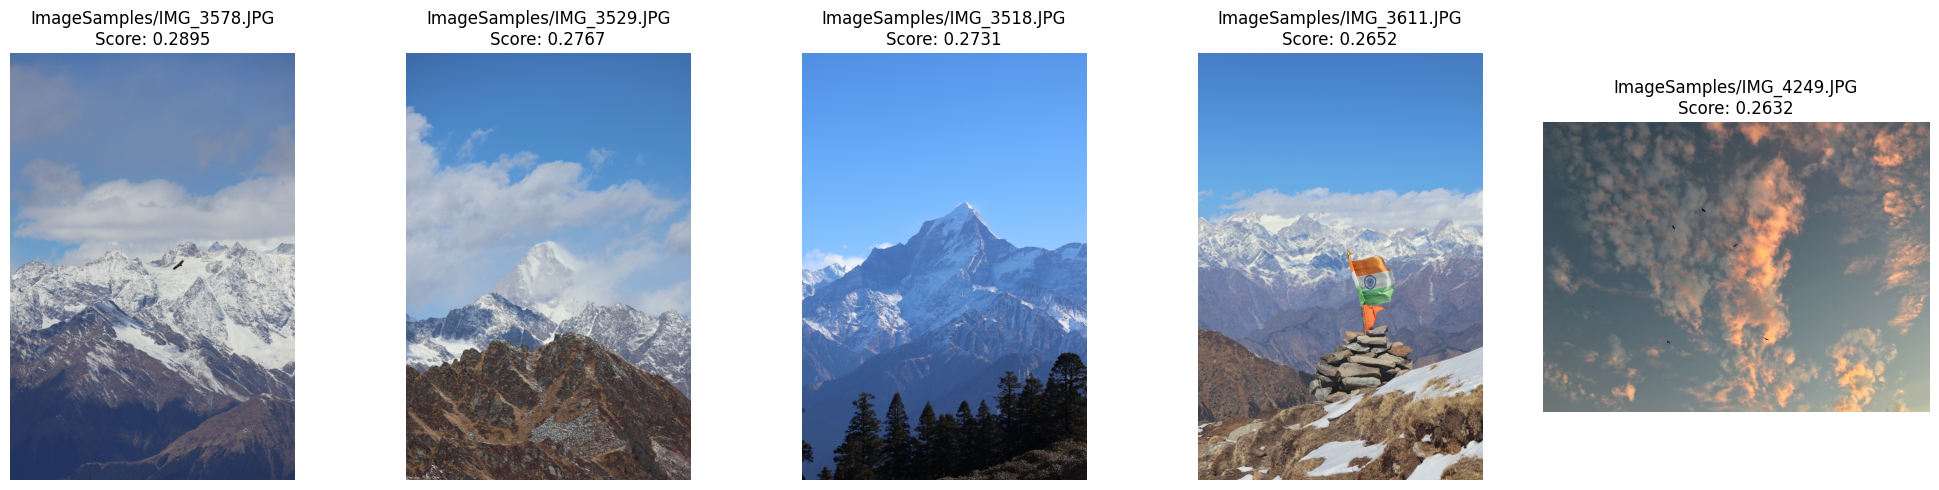

In [101]:
query = "Photos of mountains with a bird far away in the sky"
results = clipsearch.search(query, top_k=5)
print(results)

fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Create a figure with 1 row and 5 columns
for ax, (path, score) in zip(axes, results):    
    # Load and display the image
    
    # image = plt.imread(path)
    image = get_and_orient_image(path)
    ax.imshow(image)
    ax.axis('off')  # Hide axes
    ax.set_title(f"{path}\nScore: {score:.4f}")

for ax in axes[len(results):]:
    ax.axis('off')

plt.tight_layout()
plt.show()